<a href="https://colab.research.google.com/github/w1767/w1767/blob/main/Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: this program uses an aritificial recurrent neural network called Long Short Term Memory (LSTM) to predict
# the closing stock price of a corporation (Amazon Inc.) using the past 60 day stock price. 

In [ ]:
# Import the libraries
!pip install pandas_datareader
!pip install yfinance
!pip install mplfinance
import os
import argparse
import signal
import yfinance as yf
import pickle
import mplfinance as mpf
import math
import pandas_datareader.data as web
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
#from yfinance import stock_info
from dateutil.parser import parse
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
start_date = datetime(2020, 1,1)
end_date = datetime(2021, 8, 2)


In [ ]:
#Get the stock quote
data = yf.download('AMZN', start=start_date, end=end_date)
#df = web.DataReader('AMZN', data_source='yahoo',start='2012-01',end='2019-12-17')
#show the data
data.head(391)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000
2020-01-03,1864.500000,1886.199951,1864.500000,1874.969971,1874.969971,3764400
2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,1902.880005,4061800
2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,1906.859985,4044900
2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,1891.969971,3508000
...,...,...,...,...,...,...
2021-07-15,3694.199951,3695.399902,3620.919922,3631.199951,3631.199951,3185300
2021-07-16,3633.310059,3646.060059,3570.459961,3573.629883,3573.629883,4038400
2021-07-19,3532.580078,3550.209961,3499.159912,3549.590088,3549.590088,3784600


In [ ]:
#Get the number of rows and columns in the data set
data.shape



(398, 6)

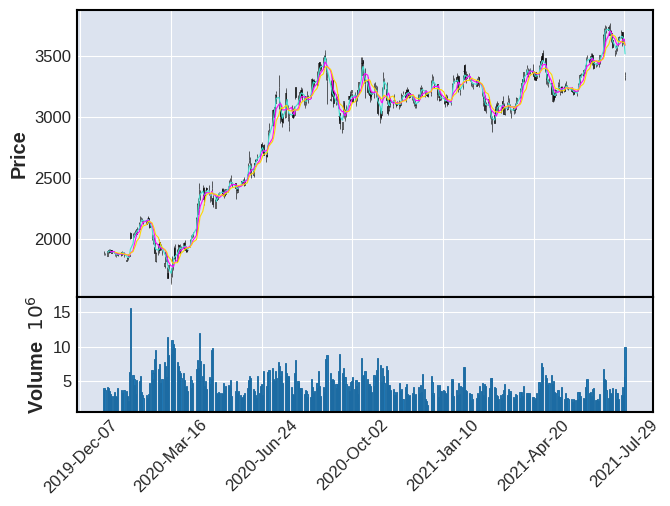

In [ ]:
mpf.plot(data, type='candle', mav= (3,6,9), volume=True, show_nontrading=True)
#Visualize the closing price history
#plt.figure(figsize=(16,8))
#plt.title('Close Price History')
#plt.plot(df['Close'])
#plt.xlabel('Date',fontsize=18)
#plt.ylabel('Close Price USD($)',fontsize=18)
#plt.show()

In [ ]:
#Create a new dataframe with only the 'Close column'
data = data.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

319

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data



array([[0.10774773],
       [0.09653494],
       [0.11011779],
       [0.11205471],
       [0.10480825],
       [0.10922721],
       [0.10052076],
       [0.10448222],
       [0.09384367],
       [0.09023265],
       [0.09798032],
       [0.09154662],
       [0.10482286],
       [0.10261338],
       [0.10121179],
       [0.09004771],
       [0.07384173],
       [0.08596458],
       [0.08827624],
       [0.09444718],
       [0.16162643],
       [0.1594267 ],
       [0.18155536],
       [0.17678607],
       [0.18182792],
       [0.19596557],
       [0.22255205],
       [0.23077189],
       [0.23524919],
       [0.23031932],
       [0.22301934],
       [0.23314189],
       [0.24022289],
       [0.23189124],
       [0.20408799],
       [0.16190387],
       [0.14411622],
       [0.14744987],
       [0.10107556],
       [0.10080788],
       [0.13497176],
       [0.1130913 ],
       [0.14562   ],
       [0.12041077],
       [0.10924664],
       [0.06034651],
       [0.10473524],
       [0.070

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print (x_train)
    print (y_train)
    print ()

[array([0.10774773, 0.09653494, 0.11011779, 0.11205471, 0.10480825,
       0.10922721, 0.10052076, 0.10448222, 0.09384367, 0.09023265,
       0.09798032, 0.09154662, 0.10482286, 0.10261338, 0.10121179,
       0.09004771, 0.07384173, 0.08596458, 0.08827624, 0.09444718,
       0.16162643, 0.1594267 , 0.18155536, 0.17678607, 0.18182792,
       0.19596557, 0.22255205, 0.23077189, 0.23524919, 0.23031932,
       0.22301934, 0.23314189, 0.24022289, 0.23189124, 0.20408799,
       0.16190387, 0.14411622, 0.14744987, 0.10107556, 0.10080788,
       0.13497176, 0.1130913 , 0.14562   , 0.12041077, 0.10924664,
       0.06034651, 0.10473524, 0.07020148, 0.        , 0.05274967,
       0.0061028 , 0.06386509, 0.07464961, 0.0994355 , 0.08248004,
       0.11009343, 0.12823146, 0.10182499, 0.13572125, 0.10876484])]
[0.13983841544791897]



In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(259, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

259/259 [==============================] - 10s 26ms/step - loss: 0.0403


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)



In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

211.511347903481

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


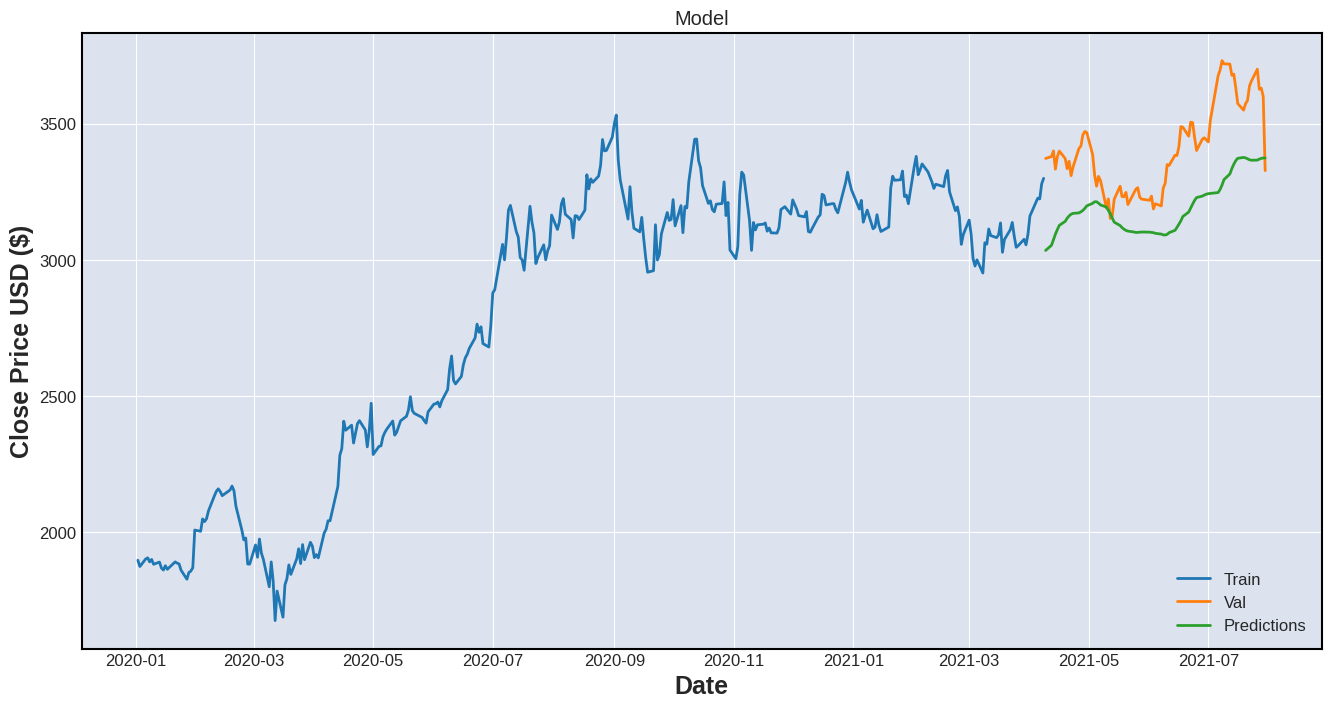

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
#show the valid and predicted return
valid

,Close,Predictions
Date,,
2021-04-09,3372.199951,3034.739502
2021-04-12,3379.389893,3053.694092
2021-04-13,3400.000000,3073.878418
2021-04-14,3333.000000,3094.482422
2021-04-15,3379.090088,3111.388184
...,...,...
2021-07-26,3699.820068,3366.305176
2021-07-27,3626.389893,3369.934082
2021-07-28,3630.320068,3372.346680


In [ ]:
#get the quote
apple_quote = yf.download('AMZN', start=start_date, end=end_date)
#Create a new dataframe
new_data = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[*********************100%***********************]  1 of 1 completed
[[3362.0483]]
